In [1]:
#we wil learn the syntax basics for the keras API of the tensorflow

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The sav

In [4]:
#we will use fake data at first
df=pd.read_csv('DATA/fake_reg.csv')

In [5]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


In [6]:
#we will treat this as a rgression problem where based of feature 1 and feature 2 we will attempt to predict the price
#supervised learning problem
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     1000 non-null   float64
 1   feature1  1000 non-null   float64
 2   feature2  1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


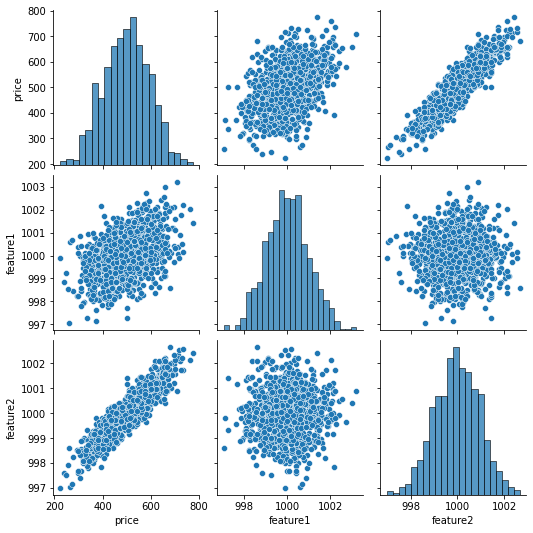

In [7]:
sns.pairplot(df)

In [8]:
from sklearn.model_selection import train_test_split

In [12]:
X=df[['feature1','feature2']].values
X
#because of the way tensor flow works we have to actually pass in numpy arrays instead of pandas dataframes/series
#add .values at the end of series or a dataframe and it will return back as a numpy array

array([[ 999.78755752,  999.7660962 ],
       [ 998.86161491, 1001.04240315],
       [1000.07026691,  998.84401463],
       ...,
       [1001.45164617,  998.84760554],
       [1000.77102275,  998.56285086],
       [ 999.2322436 , 1001.45140713]])

In [15]:
y=df['price'].values

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [17]:
X_train.shape

(700, 2)

In [18]:
X_test.shape

(300, 2)

In [19]:
#typically the next step is to actually normalize or scale our data. Because we are working with weights and biases inside
#of a NN, if we have really large values in our feature set that could cause error with the weights. So, one way to try to
#avoid any issues when training our network is to normalize or scale our feature data.
from sklearn.preprocessing import MinMaxScaler
#there are lot of different ways we can normalize or scale our data. We use Minmaxscaler in this case

In [20]:
help(MinMaxScaler)

Help on class MinMaxScaler in module sklearn.preprocessing._data:

class MinMaxScaler(sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  MinMaxScaler(feature_range=(0, 1), *, copy=True, clip=False)
 |  
 |  Transform features by scaling each feature to a given range.
 |  
 |  This estimator scales and translates each feature individually such
 |  that it is in the given range on the training set, e.g. between
 |  zero and one.
 |  
 |  The transformation is given by::
 |  
 |      X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
 |      X_scaled = X_std * (max - min) + min
 |  
 |  where min, max = feature_range.
 |  
 |  This transformation is often used as an alternative to zero mean,
 |  unit variance scaling.
 |  
 |  Read more in the :ref:`User Guide <preprocessing_scaler>`.
 |  
 |  Parameters
 |  ----------
 |  feature_range : tuple (min, max), default=(0, 1)
 |      Desired range of transformed data.
 |  
 |  copy : bool, default=True
 |      Set to Fal

In [21]:
#we don't need to scale the labels, we only scale the features since they pass through the NN
scaler=MinMaxScaler()

In [22]:
scaler.fit(X_train)
#the reason we only run it on the training set is because we want to prevent data leakeage from the test set. We don't want
#to assume that we have prior information of the test set. So we only fit our scaler to our training set to not try to cheat
#and look into the test set.

MinMaxScaler()

In [23]:
X_train=scaler.transform(X_train)

In [24]:
X_train

array([[0.74046017, 0.32583248],
       [0.43166001, 0.2555088 ],
       [0.18468554, 0.70500664],
       ...,
       [0.54913363, 0.79933822],
       [0.2834197 , 0.38818708],
       [0.56282703, 0.42371827]])

In [25]:
X_test=scaler.transform(X_test)

In [26]:
X_test

array([[ 0.39533339,  0.38540671],
       [ 0.57300502,  0.74070924],
       [ 0.61294076,  0.65734264],
       [ 0.38169528,  0.73076311],
       [ 0.07776591,  0.46323644],
       [ 0.49421971,  0.68949258],
       [ 0.2065742 ,  0.70096247],
       [ 0.55141988,  0.41776773],
       [ 0.36812191,  0.69082394],
       [ 0.56465724,  0.3877465 ],
       [ 0.57048029,  0.71810824],
       [ 0.79569525,  0.47979901],
       [ 0.38488235,  0.41856516],
       [ 0.33142545,  0.42411972],
       [ 0.89361377,  0.63912775],
       [ 0.50191166,  0.39789174],
       [ 0.7159808 ,  0.43688384],
       [ 0.35812192,  0.92028225],
       [ 0.49989367,  0.85589311],
       [ 0.63965434,  0.59024789],
       [ 0.19053626,  0.34203634],
       [ 0.40982896,  0.45849208],
       [ 0.26844791,  0.40167269],
       [ 0.38649709,  0.33592759],
       [ 0.50654703,  0.65789843],
       [ 0.41260556,  0.79338075],
       [ 0.45631316,  0.61323307],
       [ 0.44064792,  0.40889315],
       [ 0.42963904,

In [27]:
#now since we have scaled our data we will learn to create our NN with the keras syntax
from tensorflow.keras.models import Sequential
#the above is the way keras api is packaged inside tensorflow (tensorflow.keras) and then we can do any imports that we want
#as if we have already installed the keras library separately

from tensorflow.keras.layers import Dense

#this is all we need to build a very simple model with keras.
#essentially what we do we setup base sequential model and keep adding layers to it. In this case we just add simple dense
#layer.

In [28]:
help(Sequential)

Help on class Sequential in module tensorflow.python.keras.engine.sequential:

class Sequential(tensorflow.python.keras.engine.training.Model)
 |  Sequential(layers=None, name=None)
 |  
 |  Linear stack of layers.
 |  
 |  Arguments:
 |      layers: list of layers to add to the model.
 |  
 |  Example:
 |  
 |  ```python
 |  # Optionally, the first layer can receive an `input_shape` argument:
 |  model = Sequential()
 |  model.add(Dense(32, input_shape=(500,)))
 |  # Afterwards, we do automatic shape inference:
 |  model.add(Dense(32))
 |  
 |  # This is identical to the following:
 |  model = Sequential()
 |  model.add(Dense(32, input_dim=500))
 |  
 |  # And to the following:
 |  model = Sequential()
 |  model.add(Dense(32, batch_input_shape=(None, 500)))
 |  
 |  # Note that you can also omit the `input_shape` argument:
 |  # In that case the model gets built the first time you call `fit` (or other
 |  # training and evaluation methods).
 |  model = Sequential()
 |  model.add(Dense

In [29]:
help(Dense)

Help on class Dense in module tensorflow.python.keras.layers.core:

class Dense(tensorflow.python.keras.engine.base_layer.Layer)
 |  Dense(units, activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None, **kwargs)
 |  
 |  Just your regular densely-connected NN layer.
 |  
 |  `Dense` implements the operation:
 |  `output = activation(dot(input, kernel) + bias)`
 |  where `activation` is the element-wise activation function
 |  passed as the `activation` argument, `kernel` is a weights matrix
 |  created by the layer, and `bias` is a bias vector created by the layer
 |  (only applicable if `use_bias` is `True`).
 |  
 |  Note: If the input to the layer has a rank greater than 2, then
 |  it is flattened prior to the initial dot product with `kernel`.
 |  
 |  Example:
 |  
 |  ```python
 |  # as first layer in a sequential model:


In [31]:
#now there are 2 ways of creating keras based model
model=Sequential([Dense(4,activation='relu'),    #pass in the list of actual layers that we want
                 Dense(2,activation='relu'),     #2nd layer
                 Dense(1)])                      #output layer
#we pass in the list of sequential layers

1. model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy']) --> for multi class classification problem
2. model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy']) --> for binary class classification problem

In [33]:
#the other way we can create model is as follows:  (preferred way)

model=Sequential()

model.add(Dense(4,activation='relu'))     #for our model, 3 layers of 4 neurons each
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))

model.add(Dense(1))    #output predicts price, a single neuron

model.compile(optimizer='rmsprop',loss='mse')     #for a mean squared error regression problem
#we are performing a regression problem because our label is a continuous value.

In [36]:
#now we are ready to train/fit the model to the training data
model.fit(x=X_train,y=y_train,epochs=250)   #simplest way to fit

Train on 700 samples
Epoch 1/250
700/700 [==============================] - 0s 97us/sample - loss: 82.8273
Epoch 2/250
700/700 [==============================] - 0s 90us/sample - loss: 78.1677
Epoch 3/250
700/700 [==============================] - 0s 96us/sample - loss: 73.8176
Epoch 4/250
700/700 [==============================] - 0s 112us/sample - loss: 69.9781
Epoch 5/250
700/700 [==============================] - 0s 97us/sample - loss: 66.4855
Epoch 6/250
700/700 [==============================] - 0s 114us/sample - loss: 63.4668
Epoch 7/250
700/700 [==============================] - 0s 118us/sample - loss: 60.4099
Epoch 8/250
700/700 [==============================] - 0s 112us/sample - loss: 57.2385
Epoch 9/250
700/700 [==============================] - 0s 123us/sample - loss: 54.4325
Epoch 10/250
700/700 [==============================] - 0s 116us/sample - loss: 51.7513
Epoch 11/250
700/700 [==============================] - 0s 117us/sample - loss: 49.6017
Epoch 12/250
700/700 [==

700/700 [==============================] - 0s 78us/sample - loss: 24.0209
Epoch 95/250
700/700 [==============================] - 0s 97us/sample - loss: 24.1097
Epoch 96/250
700/700 [==============================] - 0s 110us/sample - loss: 24.1240
Epoch 97/250
700/700 [==============================] - 0s 114us/sample - loss: 24.0196
Epoch 98/250
700/700 [==============================] - 0s 111us/sample - loss: 24.3519
Epoch 99/250
700/700 [==============================] - 0s 110us/sample - loss: 23.9534
Epoch 100/250
700/700 [==============================] - 0s 107us/sample - loss: 24.0901
Epoch 101/250
700/700 [==============================] - 0s 111us/sample - loss: 24.1255
Epoch 102/250
700/700 [==============================] - 0s 110us/sample - loss: 24.1197
Epoch 103/250
700/700 [==============================] - 0s 105us/sample - loss: 24.0169
Epoch 104/250
700/700 [==============================] - 0s 111us/sample - loss: 23.9756
Epoch 105/250
700/700 [===================

700/700 [==============================] - 0s 79us/sample - loss: 23.8949
Epoch 187/250
700/700 [==============================] - 0s 94us/sample - loss: 24.0632
Epoch 188/250
700/700 [==============================] - 0s 100us/sample - loss: 23.8734
Epoch 189/250
700/700 [==============================] - 0s 88us/sample - loss: 24.1137
Epoch 190/250
700/700 [==============================] - 0s 92us/sample - loss: 24.0629
Epoch 191/250
700/700 [==============================] - 0s 100us/sample - loss: 23.9910
Epoch 192/250
700/700 [==============================] - 0s 103us/sample - loss: 23.9319
Epoch 193/250
700/700 [==============================] - 0s 91us/sample - loss: 23.9610
Epoch 194/250
700/700 [==============================] - 0s 110us/sample - loss: 23.9778
Epoch 195/250
700/700 [==============================] - 0s 126us/sample - loss: 23.9173
Epoch 196/250
700/700 [==============================] - 0s 112us/sample - loss: 23.9317
Epoch 197/250
700/700 [=================

In [37]:
model.history.history    #gives the dictionary of historical losses

{'loss': [82.82728572300502,
  78.16772748674666,
  73.81758161272322,
  69.97809494018554,
  66.48554848807198,
  63.466816101074215,
  60.409879760742186,
  57.238499516078406,
  54.43245609828404,
  51.7513451058524,
  49.60172524588449,
  47.51951775687081,
  45.10700681413923,
  43.57572043282645,
  41.37248609270368,
  39.90316687447684,
  38.555901620047436,
  36.52558008466448,
  35.3195681980678,
  34.040968235560825,
  32.97906117030553,
  31.79418826511928,
  31.048597826276506,
  29.917391640799387,
  29.66596472603934,
  28.77372622898647,
  28.26845212663923,
  27.6698299407959,
  27.165899832589286,
  26.935228249686105,
  26.699973569597518,
  26.12227370125907,
  26.048947634015764,
  25.61951251438686,
  25.714495784214566,
  25.167648413521903,
  25.465573545183453,
  24.960921696254186,
  24.994220155988423,
  24.77860844748361,
  24.338340334211075,
  24.784525495256695,
  24.516630249023436,
  24.462399357386996,
  24.567609372820172,
  24.539384754725866,
  24.59

In [38]:
loss_df=pd.DataFrame(model.history.history)
loss_df

,loss
0,82.827286
1,78.167727
2,73.817582
3,69.978095
4,66.485548
...,...
245,24.067548
246,23.962720
247,23.907858
248,24.375833


<AxesSubplot:>

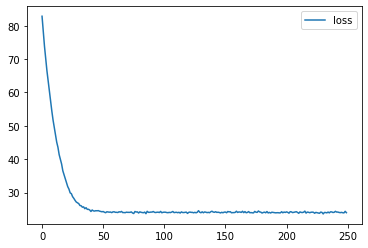

In [39]:
loss_df.plot()

In [41]:
model.evaluate(X_test,y_test,verbose=0) 
#it returns model loss (mse) on X_test and y_test

25.266974512736002

In [42]:
model.evaluate(X_train,y_train,verbose=0) 
#loss on training data

24.77173337663923

In [43]:
test_predictions=model.predict(X_test)

In [45]:
#test_predictions

In [47]:
test_predictions=pd.Series(test_predictions.reshape(300,))
test_predictions  #pandas series

0      404.663910
1      622.753601
2      591.372070
3      571.470642
4      366.005157
          ...    
295    528.322205
296    514.585754
297    608.877502
298    416.327148
299    410.240509
Length: 300, dtype: float32

In [48]:
pred_df=pd.DataFrame(y_test,columns=['Test True Y'])
pred_df

,Test True Y
0,402.296319
1,624.156198
2,582.455066
3,578.588606
4,371.224104
...,...
295,525.704657
296,502.909473
297,612.727910
298,417.569725


In [49]:
pred_df=pd.concat([pred_df,test_predictions],axis=1)
pred_df

,Test True Y,0
0,402.296319,404.663910
1,624.156198,622.753601
2,582.455066,591.372070
3,578.588606,571.470642
4,371.224104,366.005157
...,...,...
295,525.704657,528.322205
296,502.909473,514.585754
297,612.727910,608.877502
298,417.569725,416.327148


In [51]:
pred_df.columns=['Test True Y','Model Predictions']
pred_df.head()

,Test True Y,Model Predictions
0,402.296319,404.663910
1,624.156198,622.753601
2,582.455066,591.372070
3,578.588606,571.470642
4,371.224104,366.005157


<AxesSubplot:xlabel='Test True Y', ylabel='Model Predictions'>

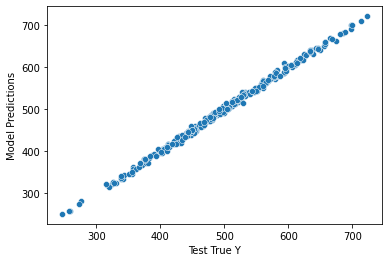

In [52]:
#we can now plot them against each other
sns.scatterplot(x='Test True Y',y='Model Predictions',data=pred_df)

In [53]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [54]:
mean_absolute_error(pred_df['Test True Y'],pred_df['Model Predictions'])

4.025232414759027

In [55]:
mean_squared_error(pred_df['Test True Y'],pred_df['Model Predictions'])

25.266978397361996

In [56]:
#prediction on brand new data
new_gem=[[998,1000]]

In [57]:
#our model is trained on scaled features
new_gem=scaler.transform(new_gem)

In [58]:
model.predict(new_gem)

array([[419.03732]], dtype=float32)

In [59]:
#if we are running a very complex model that took a lot of time to train, we want to make sure we save that model. Keras
#make it quite easy as follows:
from tensorflow.keras.models import load_model

In [60]:
model.save('my_gem_model.h5')

In [61]:
later_model=load_model('my_gem_model.h5')

In [63]:
later_model.predict(new_gem)

array([[419.03732]], dtype=float32)